In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# Load the dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# Explore the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Visualize the correlation matrix
correlation = gold_data.corr()

<ipython-input-9-29fedd245679>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

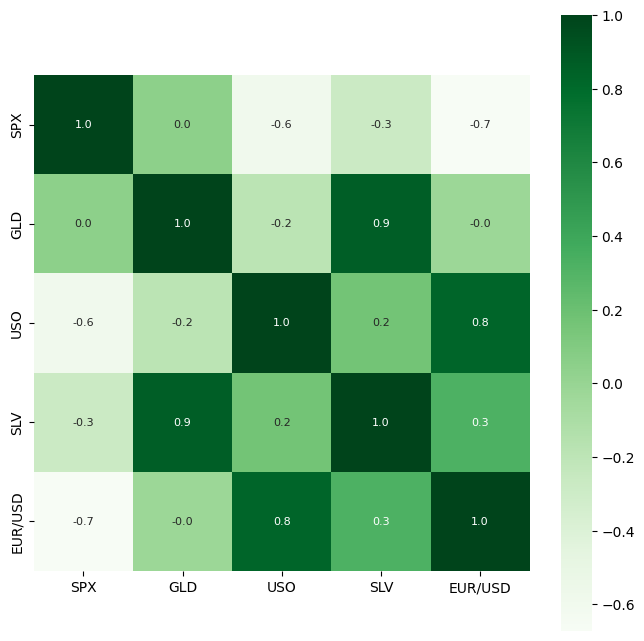

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens' )

In [11]:
# print correlation with the target varuable
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


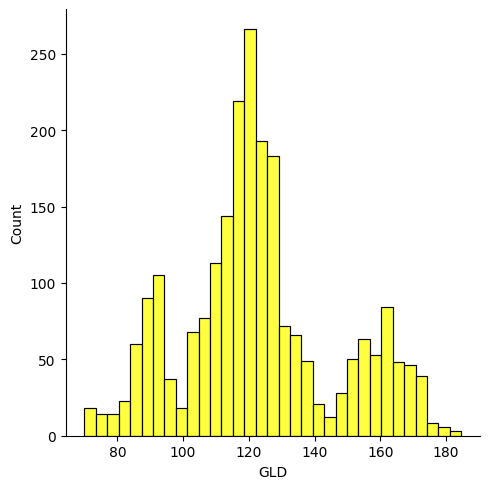

In [12]:
# Visualize the distribution of the target variable
sns.displot(gold_data['GLD'], color='yellow')

In [13]:
# prepare the data
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y =gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.2, random_state=2)

In [17]:
# define RF regressor
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# train the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.45479923  81.99469992 115.90079998 127.90370085 120.83860112
 154.82219818 149.99289772 126.14030029 117.41949873 126.0530007
 116.61490112 172.78120134 141.02419899 167.72209841 115.31610016
 117.8921005  139.79000305 169.58550055 159.30480324 159.55769975
 154.91030004 125.41910012 176.53879953 157.31790377 125.19120045
  93.78369982  78.06380024 120.67020014 119.12769964 167.3475996
  88.0939005  125.34920031  90.96430069 117.74349989 121.05609897
 136.86970163 115.4683014  114.90590047 148.45999986 107.00160062
 104.19730268  87.13859793 126.65180062 117.85529987 152.90179922
 119.60960001 108.34920033 108.10729858  93.23730042 127.24089731
  74.79180049 113.66529942 121.03899998 111.2335994  118.99409899
 120.68059926 159.90370031 167.33740052 146.9699971   85.93129862
  94.44950053  86.93799888  90.53179987 119.09730055 126.44330073
 127.42430013 170.63770008 122.28869949 117.28909926  98.62299994
 168.48060137 142.76769842 131.47390257 121.09740235 120.9985996
 119.68910083

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9889714624772402


In [21]:
# compare the actual values and predicted values in plot
Y_test = list(Y_test)

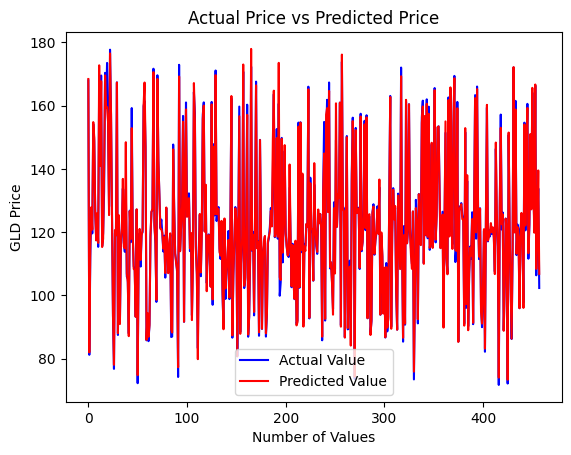

In [22]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color='red', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# new dataset in a DataFrame format similar to training data
new_data = pd.read_csv('/content/gld_price_new_data.csv')
new_data = new_data.drop(['Date', 'GLD'], axis=1)

# Make and display predictions using the trained model
new_predictions = regressor.predict(new_data)
print(new_predictions)